

# Investigating a Dataset 

Titanic Dataset - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.



# Variables Description 
Titanic_data.csv ( Obtained from https://www.kaggle.com/c/titanic )

Name, Age and Sex of the passenger

PassengerId:  A unique identifier for the passenger 

Survived: returns 1 if the passenger survived ,else return 0

Ticket:  Ticket Number

Fare:  Passenger Fare

Embarked:  Port of Embarkation
            (C = Cherbourg; Q = Queenstown; S = Southampton)
            
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# 1.  Analyzing the data

## Questions about the data


 Are the gender and age of the passenger influencing the chances of survival? If yes, how ?


What role did the passenger's travelling class play in his/her survival ? 

# 2. Data Wrangling Phase

1) Data acquisition




In [2]:
## Loading the data into Python

import pandas as pd

passengerinfo_file ='C:/Users/dgspa/Desktop/titanic-data.csv'
passengerinfo = pd.read_csv(passengerinfo_file)
passengerinfo.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the data in the given dataset, there is missing data in columns age and Cabin. So,the questions addressed involving these columns might not be answered accurately but we can consider dropping the rows with  missing data.


2) Data Cleaning

In [3]:
# dropping entries with missing data
passengerinfo.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [4]:
total_passengers = 891.0
nonmissing_data_rows=len(passengerinfo.dropna())
missing_data_rows = total_passengers - nonmissing_data_rows
print ('{} = {}'.format('missing_data_rows', missing_data_rows))

## percentage of missing data

percent_misssing_data =100- len(passengerinfo.dropna())*1.0/len(passengerinfo)* 100
print ('{} = {}'.format('percent_misssing_data', percent_misssing_data))

missing_data_rows = 708.0
percent_misssing_data = 79.46127946127946


In [5]:
## Missing Cabin Data Rows
missing_cabin_data_rows = len(passengerinfo['Cabin']) - passengerinfo['Cabin'].count()
print ('{} = {}'.format('No. of rows with Missing Cabin Data', missing_cabin_data_rows))

##  Missing Age Data Rows
missing_age_data_rows = len(passengerinfo['Age']) - passengerinfo['Age'].count()
print ('{} = {}'.format('No. of rows with Missing Age Data', missing_age_data_rows))

No. of rows with Missing Cabin Data = 687
No. of rows with Missing Age Data = 177


Majority of the total data i.e. 708 rows of the total 891 consist of missing data, all those rows cant be eliminated completely, since most of it consists of cabin column data, which doesnt affect the questions considered, hence, will leave the data unchanged and carry on with the analysis.

# 3. Exploration phase

## Data Statistics

In [6]:
passengerinfo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This just gives the summary of only the columns with numeric data. ( Cant draw conclusions based on sex, as per our question requirements )
Based on the numeric data statistics, we could see that -
1. The majority of passengers were travelling in passenger class '3' 
2. The oldest passenger was aged 80 and the youngest was less than a year old while the average age of the passengers was 29.6 
3. The fares ranged from $0 - $512

To find statistics based on sex ( Non- Numeric data) as per Q1:



In [7]:
## Finding the number of male and female passengers
female_passengers = (passengerinfo[passengerinfo['Sex'] == 'female'])
male_passengers = (passengerinfo[passengerinfo['Sex'] == 'male'])
print ('{} = {}'.format('Number of female passengers', len(female_passengers)))
print ('{} = {}'.format('Number of male passengers', len(male_passengers)))


Number of female passengers = 314
Number of male passengers = 577


In [8]:
##Finding the percentage of male and female passengers

percent_female = len(female_passengers)/total_passengers*100
percent_male = len(male_passengers)/total_passengers*100
print ('{} = {}'.format('percent_female', percent_female))
print ('{} = {}'.format('percent_male', percent_male))

percent_female = 35.24130190796858
percent_male = 64.75869809203144


The Percent of males aboard is comparitively larger ( 65 % )

## Analysis of survival chances based on Gender 

In [9]:
## percentage of female passengers who survived/did not survive

percent_female_survived = len(passengerinfo[(passengerinfo['Survived'] == 1) &  (passengerinfo['Sex'] == "female")])/(len(female_passengers)*1.0)*100
percent_female_notsurvived = len(passengerinfo[(passengerinfo['Survived'] == 0) &  (passengerinfo['Sex'] == "female")])/(len(female_passengers)*1.0)*100
print ('{} = {}'.format('percent_female_survived', percent_female_survived))
print ('{} = {}'.format('percent_female_notsurvived', percent_female_notsurvived))




percent_female_survived = 74.20382165605095
percent_female_notsurvived = 25.796178343949045


In [10]:
## percentage of male passengers who survived/did not survive

percent_male_survived = len(passengerinfo[(passengerinfo['Survived'] == 1) &  (passengerinfo['Sex'] == "male")])/(len(male_passengers)*1.0)*100
percent_male_notsurvived = len(passengerinfo[(passengerinfo['Survived'] == 0) &  (passengerinfo['Sex'] == "male")])/(len(male_passengers)*1.0)*100
print ('{} = {}'.format('percent_male_survived', percent_male_survived))
print ('{} = {}'.format('percent_male_notsurvived', percent_male_notsurvived))

percent_male_survived = 18.890814558058924
percent_male_notsurvived = 81.10918544194108


Populating the interactive namespace from numpy and matplotlib


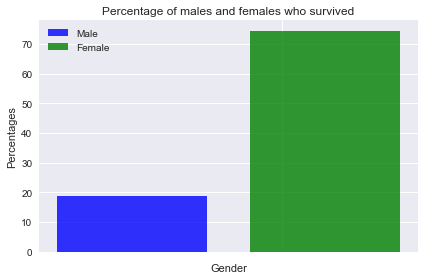

In [11]:

##Plotting the percentages of surviving males and females
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

# data to plot
n_groups = 1
means_male = (percent_male_survived)
means_female = (percent_female_survived)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_male, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Male')
 
rects2 = plt.bar(index + bar_width+0.1, means_female, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Female')
 
plt.xlabel('Gender')
plt.ylabel('Percentages')
plt.title('Percentage of males and females who survived')
plt.xticks(index + bar_width, (''))
plt.legend()
 
plt.tight_layout()
plt.show()



It can be seen from the visualization clearly that the percentage of males who survived is too less compared to female survival percentage , despite of the fact that there were more men aboard than women!

## Analysis of survival chances based on age 

In [12]:

## number of children and adults who survived

number_of_children= len(passengerinfo[passengerinfo['Age'] < 18])
number_of_adults= len(passengerinfo[passengerinfo['Age'] >= 18])
print ('{} = {}'.format('number_of_children',  number_of_children))
print ('{} = {}'.format('number_of_adults', number_of_adults))




number_of_children = 113
number_of_adults = 601


In [13]:
number_of_children_who_survived= len(passengerinfo[(passengerinfo['Age'] < 18) & (passengerinfo['Survived'] == 1)])
number_of_adults_who_survived= len(passengerinfo[(passengerinfo['Age'] >= 18) & (passengerinfo['Survived'] == 1)])
print ('{} = {}'.format('number_of_children_who_survived', number_of_children_who_survived))
print ('{} = {}'.format('number_of_adults_who_survived', number_of_adults_who_survived))

number_of_children_who_survived = 61
number_of_adults_who_survived = 229


In [14]:
## percentages of children and adults who survived

percent_children_who_survived = number_of_children_who_survived*1.0/number_of_children * 100
percent_adults_who_survived = number_of_adults_who_survived*1.0/number_of_adults * 100
print ('{} = {}'.format('percent_children_who_survived', percent_children_who_survived))
print ('{} = {}'.format('percent_adults_who_survived', percent_adults_who_survived))

percent_children_who_survived = 53.98230088495575
percent_adults_who_survived = 38.10316139767055


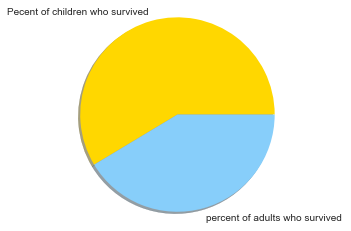

In [15]:

##Plotting the percentages of survival  based on age
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Pecent of children who survived' , 'percent of adults who survived'
means_children = (percent_children_who_survived)
means_adult = (percent_adults_who_survived)
sizes = [means_children, means_adult]
colors = ['gold', 'lightskyblue'] 
# Plot
plt.pie(sizes, labels=labels, colors=colors, shadow=True)
 
plt.axis('equal')
plt.show()

It can be seen from the above visualization that the more than half  of the total number of children aboard survived while less than 40% of adults made it through.

## Analysis of survival chances based on Class

In [86]:
## number of passengers belonging to first,second and third class
class1_passengers= len(passengerinfo[passengerinfo['Pclass'] == 1])
class2_passengers= len(passengerinfo[passengerinfo['Pclass'] == 2])
class3_passengers= len(passengerinfo[passengerinfo['Pclass'] == 3])
print ('{} = {}'.format('1st Class Passengers', class1_passengers))
print ('{} = {}'.format('2nd Class Passengers', class2_passengers))
print ('{} = {}'.format('3rd Class Passengers', class3_passengers))


1st Class Passengers = 216
2nd Class Passengers = 184
3rd Class Passengers = 491


In [87]:
## number of passengers belonging to first, second and third class who survived
surviving_class1_passengers = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1)])
surviving_class2_passengers = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1)])
surviving_class3_passengers = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1)])
print ('{} = {}'.format('Surviving 1st Class Passengers', surviving_class1_passengers))
print ('{} = {}'.format('Surviving 2nd Class Passengers', surviving_class2_passengers))
print ('{} = {}'.format('Surviving 3rd Class Passengers', surviving_class3_passengers))

Surviving 1st Class Passengers = 136
Surviving 2nd Class Passengers = 87
Surviving 3rd Class Passengers = 119


In [88]:
## Finding percentages of people belonging to the first, second, third class who survived
percent_surviving_class1_passengers = surviving_class1_passengers*1.0/class1_passengers * 100
percent_surviving_class2_passengers = surviving_class2_passengers*1.0/class2_passengers * 100
percent_surviving_class3_passengers = surviving_class3_passengers*1.0/class3_passengers * 100


print ('{} = {} %'.format('% of surviving 1st Class Passengers', percent_surviving_class1_passengers))
print ('{} = {} %'.format('% of surviving 2nd Class Passengers', percent_surviving_class2_passengers))
print ('{} = {} %'.format('% of surviving 3rd Class Passengers', percent_surviving_class3_passengers))

% of surviving 1st Class Passengers = 62.96296296296296 %
% of surviving 2nd Class Passengers = 47.28260869565217 %
% of surviving 3rd Class Passengers = 24.236252545824847 %


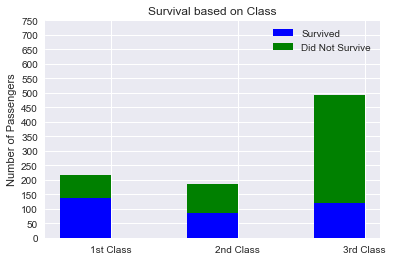

In [89]:
##Plotting the percentages of survival based on class

import numpy as np
import matplotlib.pyplot as plt

N = 3
survivedMeans = (surviving_class1_passengers, surviving_class2_passengers, surviving_class3_passengers)
notsurvivedMeans = ((class1_passengers - surviving_class1_passengers), (class2_passengers - surviving_class2_passengers), (class3_passengers - surviving_class3_passengers))

ind = np.arange(N)    # the x locations for the groups
width = 0.4      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survivedMeans, width, color='b')
p2 = plt.bar(ind, notsurvivedMeans, width, color='g', bottom=survivedMeans)

plt.ylabel('Number of Passengers')
plt.title('Survival based on Class')
plt.xticks(ind + width/2, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Did Not Survive'))

plt.show()

The visualization above clearly shows passengers from 1st class had more chances of survival over the other classes, and as all women had higher chances of survival ( from previous visualization ) , being a female and 1st class passenger had the highest chances of survival.

## Analysis of survival chances based on sex and class

In [90]:
## number of males and females belonging to different classes 
class1_females = len(passengerinfo[(passengerinfo['Pclass'] ==1) & (passengerinfo['Sex'] == "female")])
class1_males = len(passengerinfo[(passengerinfo['Pclass'] ==1) & (passengerinfo['Sex'] == "male")])
class2_females = len(passengerinfo[(passengerinfo['Pclass'] ==2) & (passengerinfo['Sex'] == "female")])
class2_males = len(passengerinfo[(passengerinfo['Pclass'] ==2) & (passengerinfo['Sex'] == "male")])
class3_females = len(passengerinfo[(passengerinfo['Pclass'] ==3) & (passengerinfo['Sex'] == "female")])
class3_males = len(passengerinfo[(passengerinfo['Pclass'] ==3) & (passengerinfo['Sex'] == "male")])

surviving_class1_females = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class1_males = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])
surviving_class2_females = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class2_males = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])
surviving_class3_females = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class3_males = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])

## percentages of males and females belonging to different classes 
percent_class1_females = surviving_class1_females*1.0/class1_females*100
percent_class1_males = surviving_class1_males*1.0/class1_males*100
percent_class2_females = surviving_class2_females*1.0/class2_females*100
percent_class2_males = surviving_class2_males*1.0/class2_males*100
percent_class3_females = surviving_class3_females*1.0/class3_females*100
percent_class3_males = surviving_class3_males*1.0/class3_males*100

print ('{} = {} %'.format('% of surviving 1st Class Females', percent_class1_females))
print ('{} = {} %'.format('% of surviving 1st Class Males',percent_class1_males))
print ('{} = {} %'.format('% of surviving 2nd Class Females',percent_class2_females)) 
print ('{} = {} %'.format('% of surviving 2nd Class Males',percent_class2_males)) 
print ('{} = {} %'.format('% of surviving 3rd Class Females',percent_class3_females))
print ('{} = {} %'.format('% of surviving 3rd Class Males', percent_class3_males)) 

% of surviving 1st Class Females = 96.80851063829788 %
% of surviving 1st Class Males = 36.885245901639344 %
% of surviving 2nd Class Females = 92.10526315789474 %
% of surviving 2nd Class Males = 15.74074074074074 %
% of surviving 3rd Class Females = 50.0 %
% of surviving 3rd Class Males = 13.544668587896252 %


It can be seen from above ( combined effects of gender and class) that women from upper class ( class1 ) had higher chance of survival than the other classes and men ( class2 and class3 )

 ## Limitations faced
 Missing data was the major limitation faced.
 
 The columns age and cabin had missing data , to address questions based on cabin was not possible due to this. I considered dropping the rows with missing data and not making changes to column cabin as it was not primarily the column required to address the questions i started the analysis with.

# 4.Conclusion Phase

1. Less than 20 percent of the total men survived ( 109 out of 577 ) while 74 percent of the total women survived ( 233 out of 314 ), though the total number of men aboard were more than women.
2. A higher percentage of children made it through as compared to the adults.
3. 62.96 percent of the 1st class passengers survived and had higher chances of survival than the other two classes.
4. Women, children and people of 1st class had better chances of survival aboard on  RMS titanic, proving that gender, age and class affected the chances of the passenger survival.

# References

https://www.kaggle.com/c/titanic

https://pythonspot.com/en/matplotlib-bar-chart/

https://en.wikipedia.org/wiki/Women_and_children_first